# 1

The simple linear regression model is used to model the correlation between two variables. The statistical method can be expressed mathematically as  $Y = β_0 + β_1X + ε$. 

Y: The dependent variable, which is what we are trying to predict. 

X: The independent variable, which will influence the dependent variable.

$\beta_1$: The slope coefficient, represents the change in the outcome of y for one unit change in the predictor variable x.

$\beta_0$: The intercept coefficient, represents the outcome of y, for when x is 0.

$\epsilon$: The error term, represent the random variation that is likely to occur in y for every x; since, x and y is not always perfectly linear.

When we calculate y values, given an x value we are sampling from a normal distribution around the line, the error term will shift the value y above or below the line. 




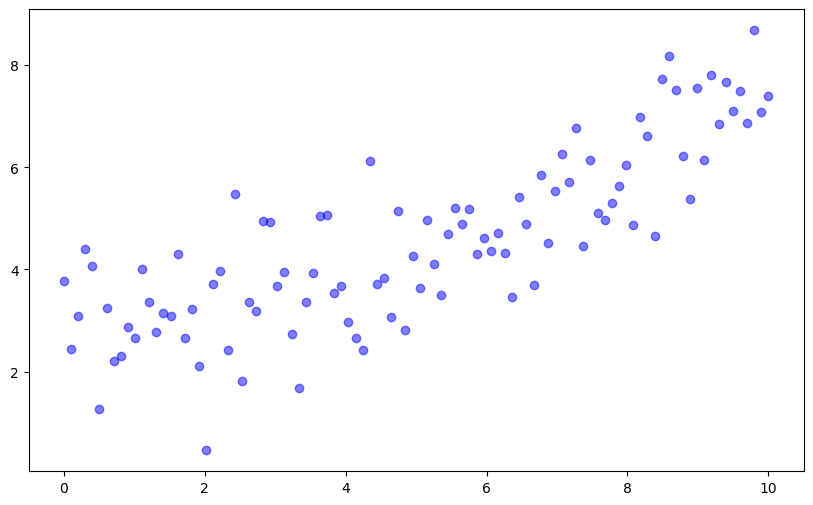

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(0)

# Define parameters for the linear model
beta_0 = 2.0  # Intercept
beta_1 = 0.5  # Slope
sigma = 1.0   # Standard deviation of error term

# Generate predictor variable X
n_samples = 100
X = np.linspace(0, 10, n_samples)

# Generate error term epsilon ~ N(0, sigma^2)
epsilon = np.random.normal(0, sigma, n_samples)

# Generate outcome variable Y according to the SLR model
Y = beta_0 + beta_1 * X + epsilon

# Plot the data points and the true regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label="Generated Data (Y)", color="blue", alpha=0.5)
# plt.plot(X, beta_0 + beta_1 * X, color="red", label="True Regression Line (Y = β0 + β1X)")
# plt.xlabel("Predictor (X)")
# plt.ylabel("Outcome (Y)")
# plt.title("Simple Linear Regression Model with Error Term")
# plt.legend()
plt.show()


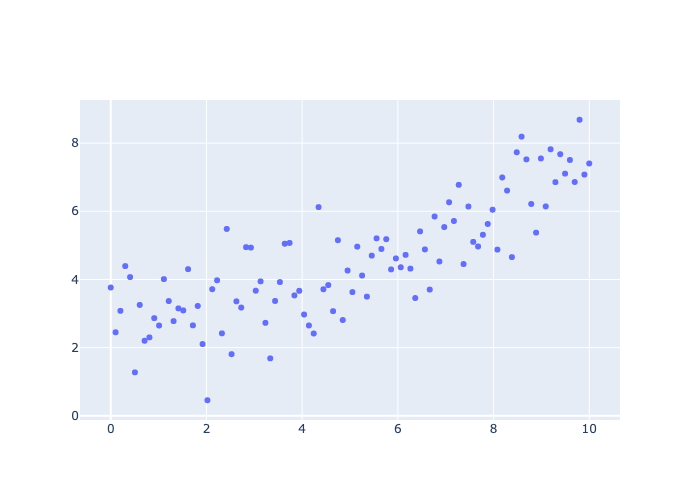

In [60]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Data'))
fig.show(renderer='png')

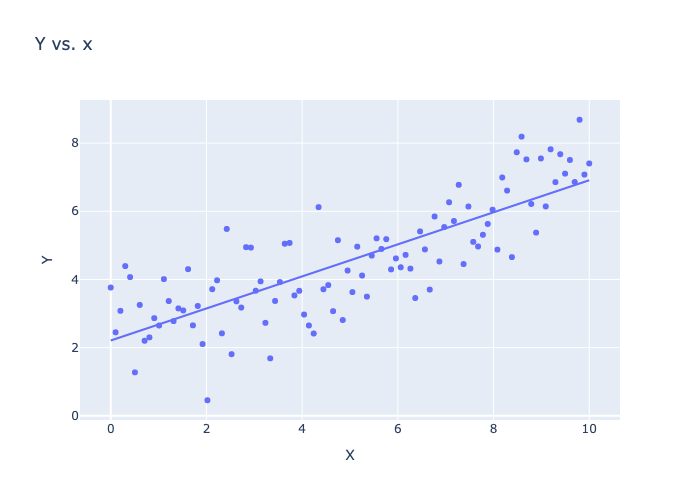

In [62]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({'X': X, 'Y': Y})

fig = px.scatter(df, x='X',  y='Y', 
           trendline='ols', title='Y vs. x')

fig.show(renderer='png')

# 2

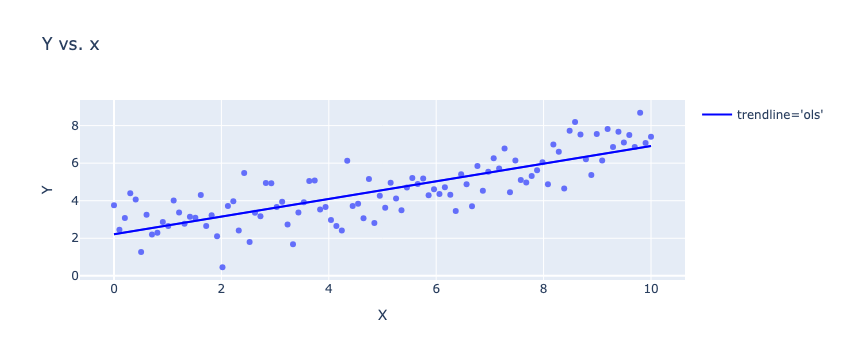

In [70]:
import statsmodels.formula.api as smf  # what is this library for?
import plotly.express as px  # this is a ploting library

# what are the following two steps doing?
model_data_specification = smf.ols("Y~X", data=df) 
fitted_model = model_data_specification.fit() 

# what do each of the following provide?
fitted_model.summary()  # simple explanation? 
fitted_model.summary().tables[1]  # simple explanation?
fitted_model.params  # simple explanation?
fitted_model.params.values  # simple explanation?
fitted_model.rsquared  # simple explanation?

# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='X',  y='Y', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['X'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# 3

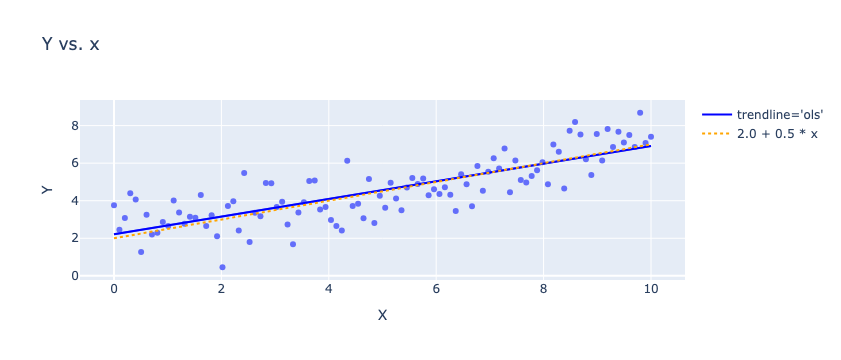

In [77]:
# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['X'].min(), df['X'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta_0 + beta_1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta_0)+' + '+str(beta_1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS